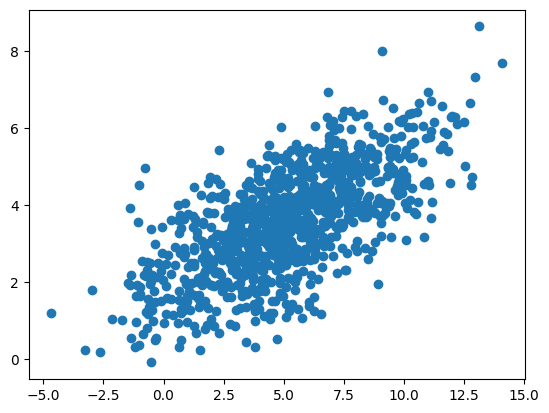

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
num_samples = 1000

x = np.random.normal(5, 3, num_samples)
y = 0.3*x + np.random.normal(2, 1, num_samples)

plt.scatter(x, y)
plt.show()


1. Eulcideian Distance 


      i. Distance

     ii. Threshold assumed 
     
    iii. detecting outliers: if eulcideian distance > threshold (then add into the outliers) 

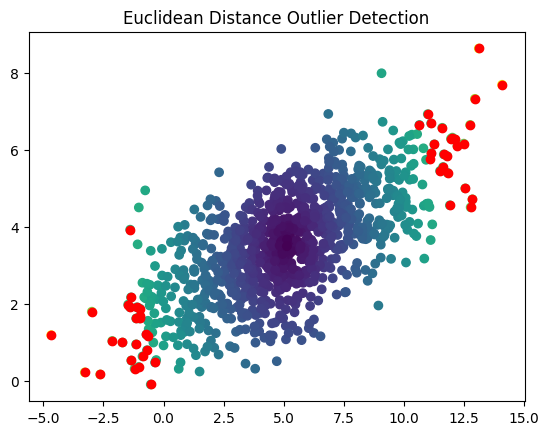

In [48]:
data = np.vstack((x, y)).T
mean_x = np.mean(x)
mean_y = np.mean(y)
euclideian_dist = np.sqrt((x-mean_x)**2 + (y - mean_y)**2)
threshold_euclidean = np.percentile(euclideian_dist, 95)
outliers_euclidean = data[euclideian_dist > threshold_euclidean]
plt.title('Euclidean Distance Outlier Detection')
plt.scatter(x, y, c=euclideian_dist)
plt.scatter(outliers_euclidean[:, 0], outliers_euclidean[:, 1], color='red')
plt.show()

2. Mahalanobis Distance 

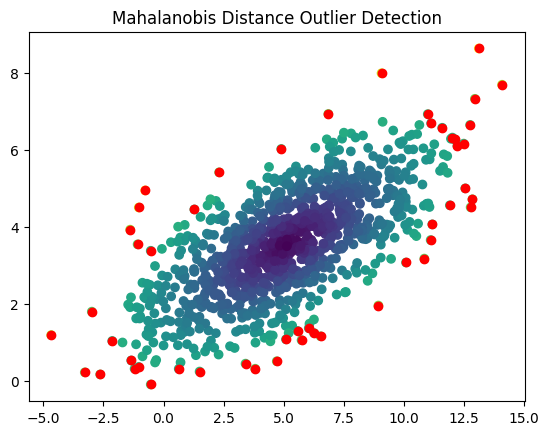

In [49]:
mean_vector = np.array([mean_x, mean_y])
S = np.cov(data, rowvar=False)
S_inverse =  np.linalg.inv(S)

mahal_dist = []
for i in data:
    diff = i - mean_vector
    distance = np.sqrt(diff.T @ S_inverse @ diff)
    mahal_dist.append(distance)
mahal_dist = np.array(mahal_dist)


threshold_mahalanobis = np.percentile(mahal_dist, 95)
outliers_mahalanobis = data[mahal_dist > threshold_mahalanobis]

plt.title('Mahalanobis Distance Outlier Detection')
plt.scatter(x, y, c=mahal_dist)
plt.scatter(outliers_mahalanobis[:, 0], outliers_mahalanobis[:, 1], color='red')
plt.show()

Comapre

[[-4.67524931  1.18916251]
 [-3.27524399  0.22023815]
 [12.48860867  6.16619618]
 [12.22656635  6.10966134]
 [12.77706837  4.51032081]
 [-2.13529659  1.03633206]
 [12.75469604  6.65327138]
 [-2.63565113  0.16567093]
 [-1.34437177  0.52937608]
 [12.85065209  4.71967299]
 [12.95364279  7.33110057]
 [11.13276794  6.69466203]
 [11.59433123  6.57824083]
 [14.08413924  7.6968111 ]
 [12.55269133  5.00329315]
 [-2.98396164  1.79772176]
 [-1.38842133  3.929374  ]
 [10.99414672  6.93321175]
 [-1.202526    0.31469787]
 [13.1172412   8.63977184]
 [-0.53119051 -0.09533801]
 [-1.03443105  0.36068084]
 [11.91212883  4.56312546]
 [12.01779794  6.3229259 ]
 [12.120234    6.27610501]]


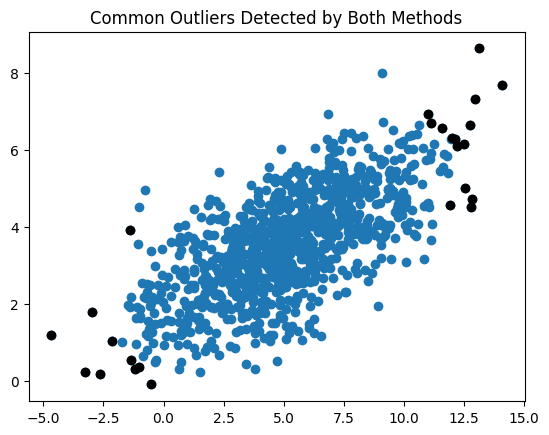

In [50]:
common_outliers = [];
for i in range(num_samples):
    if euclideian_dist[i] > threshold_euclidean and mahal_dist[i] > threshold_mahalanobis:
        common_outliers.append(data[i])

common_outliers = np.array(common_outliers) 
print(common_outliers)
plt.title('Common Outliers Detected by Both Methods')
plt.scatter(x, y)
if len(common_outliers) > 0:
    plt.scatter(common_outliers[:, 0], common_outliers[:, 1], color='black')
plt.show()

PART 2

Making a fucntion fro Mahalonobis and not Eulcideian